In [6]:
# import
import pandas as pd
import numpy as np
import glob
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.pyplot as plt
import itertools
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Machine Learning libraries.
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    


def Classifier_performance(clf, target_names, y, filledData, X_train, X_test, y_train, y_test, title="confusion matrix"):
    # Fitting the training data
    clf.fit(X_train, y_train)
    
    # Predicting the data
    y_pred = clf.predict(X_test)
    Y_train_pred = clf.predict(X_train)
    
    # Printing the accuracies and confusion matrix
    print("Training Accuracy Score: ", accuracy_score(Y_train_pred , y_train))
    print("validation Accuracy Score:", accuracy_score(y_pred, y_test))
    print("Classification Report: ")
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred)
    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cm, classes=target_names, normalize=False,
                          title=title)

    plt.show()
    plt.close()
    
    # Showing the lower dimension data projection using PCA
    pca = PCA(n_components=2)
    
    # Fitting and transformed the data
    filledData_lower = pca.fit_transform(filledData)
    y = pd.Series(y)
    filledData_lower = pd.DataFrame(filledData_lower)
    filledData_lower['labels'] = y.values
    
    # Creating the figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15) # X Axis
    ax.set_ylabel('Principal Component 2', fontsize = 15) # Y Axis
    ax.set_title('2 component PCA', fontsize = 20) # Title
    crash = filledData_lower[filledData_lower["labels"] == 1]
    no_crash = filledData_lower[filledData_lower["labels"] == 0]
    ax.plot(crash[0], crash[1], "*", label=target_names[0])
    ax.plot(no_crash[0], no_crash[1], "o", label=target_names[1])
    plt.legend()
    plt.show()
    plt.close()

In [18]:
leftTurn = pd.read_excel("leftturn_new.xlsx")
data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent","preIncidentManeuver","crashStatus", "crash", "maneuverJudgment", "incomplete_video", "vehicle_movement"], axis = 1)

In [19]:
# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')
temp = (temp - temp.mean())/temp.std()

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]] = temp

# Filling Qualtrics Varible with 1
filledData = data.fillna(1)

In [20]:
# Getting the crash Status
y = leftTurn["crashStatus"]

# Crash and near crash as one field 
y[y=="Balanced-Sample Baseline"] = False
y[y != False] = True
y  = np.asarray(y,dtype=np.float64)
print("Number of crashs events: ", sum(y))
print("Class Balance with Crash and no Crash: ", sum(y)/len(y))
# from sklearn.feature_selection import SelectKBest,f_classif
# selector = SelectKBest(f_classif, k=10).fit(filledData,y)
# featurefilledData = selector.transform(filledData)

# Traing test split of the data 
X_train, X_test, y_train, y_test = train_test_split(filledData, y, train_size=0.8, random_state=42)

Number of crashs events:  145.0
Class Balance with Crash and no Crash:  0.506993006993007


# Predicting Crash risk of all the drivers using Support Vector Machine considering crash and near crash as one entry.

In [21]:
# Loading neccesary library for the support vector machine
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Training Accuracy Score:  0.793859649122807
validation Accuracy Score: 0.6551724137931034
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.66      0.74      0.70        31
      Crash       0.65      0.56      0.60        27

avg / total       0.65      0.66      0.65        58

Confusion matrix, without normalization
[[23  8]
 [12 15]]


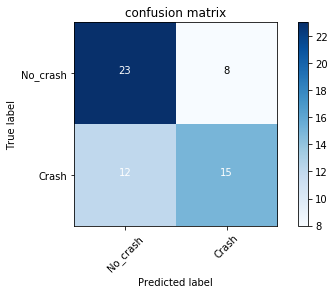

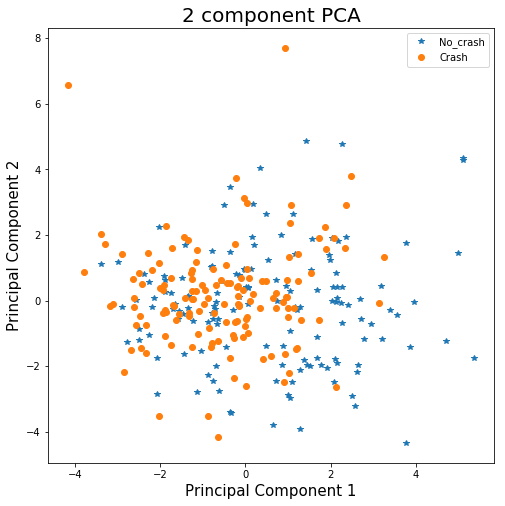

In [22]:
clf = LogisticRegression( penalty='l1')
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# Support Vector Machine Learning Model to predict crash and no crash risk

Training Accuracy Score:  0.793859649122807
validation Accuracy Score: 0.7068965517241379
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.66      0.94      0.77        31
      Crash       0.86      0.44      0.59        27

avg / total       0.75      0.71      0.69        58

Confusion matrix, without normalization
[[29  2]
 [15 12]]


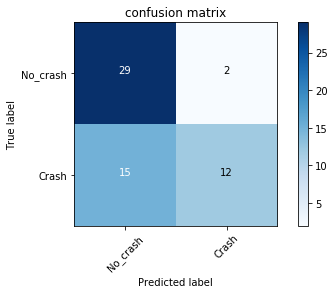

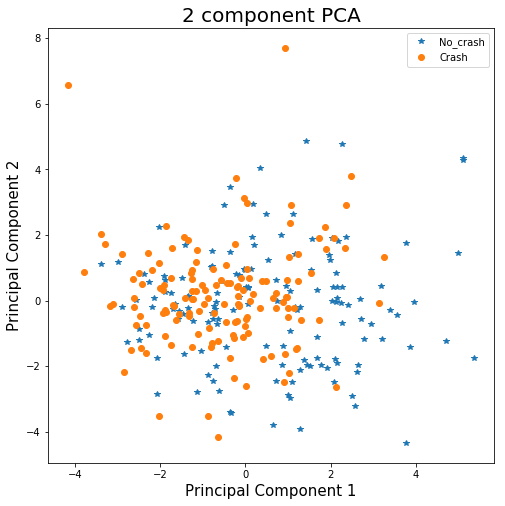

In [23]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10, 0.5, 0.25, 0.125, 0.065], "degree":[3, 5, 7, 9, 15]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=3)
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [24]:
X = filledData

In [27]:
clf.best_estimator_

SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# After Training 105 (3, 5, 7) Different model for the best parameter search. We Found a model which does generalizes
# with the validation data and does not suffer from over fitting. The Current SVM model acheives 2 percent better 
# model performance.

#  Random Forest Based Machine Learning Models


Training Accuracy Score:  0.9385964912280702
validation Accuracy Score: 0.6896551724137931
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.67      0.84      0.74        31
      Crash       0.74      0.52      0.61        27

avg / total       0.70      0.69      0.68        58

Confusion matrix, without normalization
[[26  5]
 [13 14]]


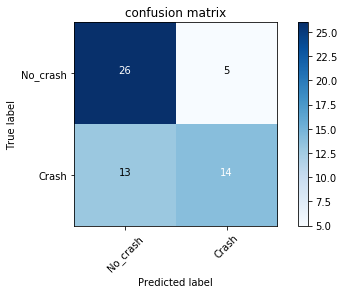

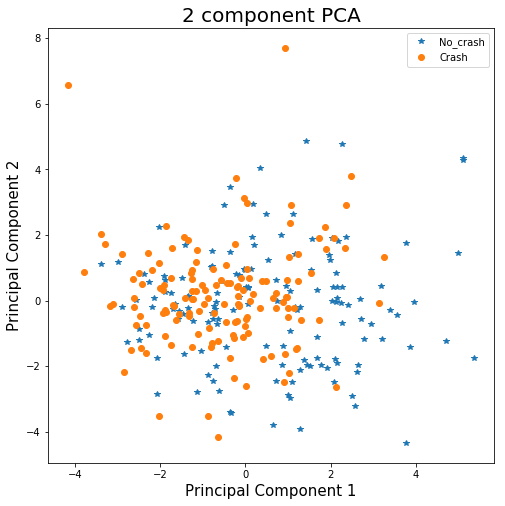

In [29]:
parameters = {"n_estimators":[1, 5, 10, 25, 50, 100, 250], "criterion":["gini", "entropy"], "max_depth":[5, 10, 26, 50, 100]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=7)
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [30]:
est = sm.OLS(y, filledData.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     9.684
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           9.45e-36
Time:                        15:11:43   Log-Likelihood:                -142.23
No. Observations:                 286   AIC:                             390.5
Df Residuals:                     233   BIC:                             584.2
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Time_day                -0.2328 

# Predicting Crash risk for including just crash and baseline condition. (Near crash not considered) using the vehicle profile from both young and old driver.

In [33]:
leftTurn = pd.read_excel("leftturn_new.xlsx")

# removing the near crash files.
leftTurn = leftTurn[leftTurn["crashStatus"] != 'Near-Crash'] 

data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent",
                      "preIncidentManeuver", "crash", "maneuverJudgment", "incomplete_video", 
                      "vehicle_movement", 'intersection_type'], axis = 1)


# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')
temp = (temp - temp.mean())/temp.std()

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]] = temp

# Filling Qualtrics Varible with 1
y = data["crashStatus"]
data = data.drop( 'crashStatus', axis=1)
y[y=="Balanced-Sample Baseline"] = False
y[y != False] = True
y  = np.asarray(y,dtype=np.float64)
filledData = data.fillna(1)

print("Number of crashs events: ", sum(y))
print("Class Balance with Crash and Baseline Condition: ", sum(y)/len(y))
X_train, X_test, y_train, y_test = train_test_split(filledData, y, train_size=0.7, random_state=42)

Number of crashs events:  37.0
Class Balance with Crash and Baseline Condition:  0.20786516853932585


Training Accuracy Score:  0.9516129032258065
validation Accuracy Score: 0.8333333333333334
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.87      0.93      0.90        43
      Crash       0.62      0.45      0.53        11

avg / total       0.82      0.83      0.82        54

Confusion matrix, without normalization
[[40  3]
 [ 6  5]]


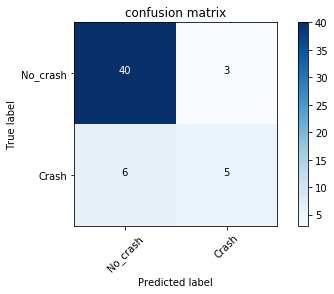

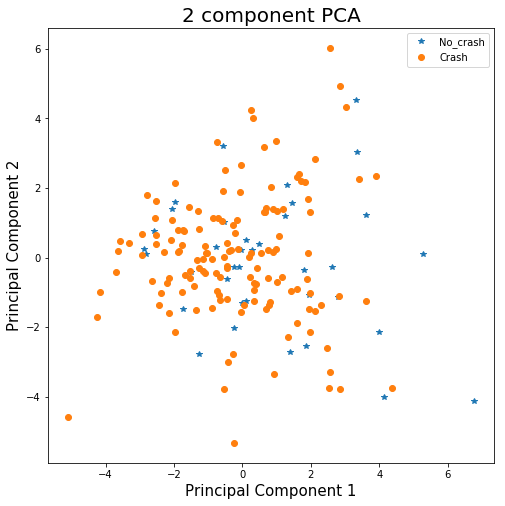

In [34]:
clf = LogisticRegression(max_iter=100, penalty='l1')
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# SVM Based model :
    Predicting Crash risk for including just crash and baseline condition. (Near crash not considered) using the vehicle profile from both young and old driver.

Training Accuracy Score:  1.0
validation Accuracy Score: 0.8518518518518519
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.86      0.98      0.91        43
      Crash       0.80      0.36      0.50        11

avg / total       0.85      0.85      0.83        54

Confusion matrix, without normalization
[[42  1]
 [ 7  4]]


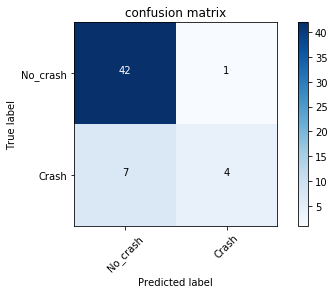

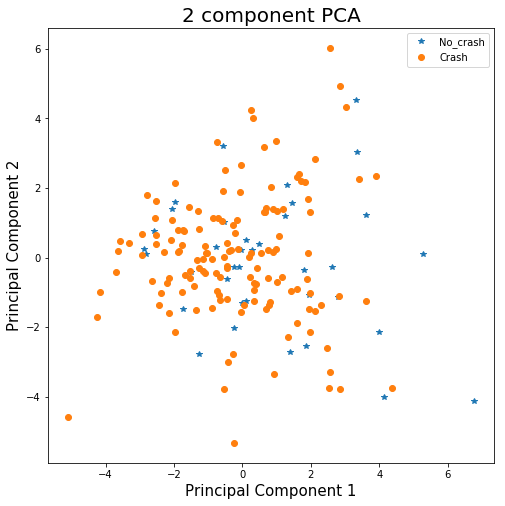

In [35]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10, 0.5, 0.25, 0.125, 0.065], "degree":[3, 5, 7, 9, 15]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=3)
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# Random Forest Based Machine Learning Models¶:
    Predicting Crash risk for including just crash and baseline condition. (Near crash not considered) using the vehicle profile from both young and old driver.

Training Accuracy Score:  0.9838709677419355
validation Accuracy Score: 0.7962962962962963
Classification Report: 
             precision    recall  f1-score   support

   No_crash       0.82      0.95      0.88        43
      Crash       0.50      0.18      0.27        11

avg / total       0.75      0.80      0.76        54

Confusion matrix, without normalization
[[41  2]
 [ 9  2]]


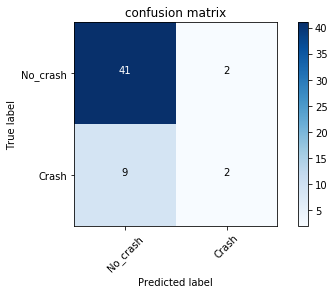

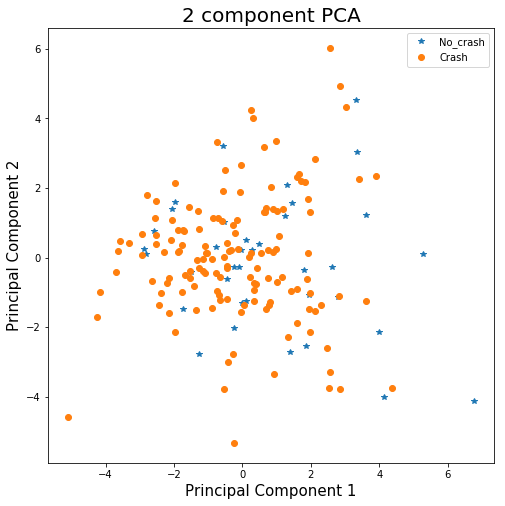

In [36]:
parameters = {"n_estimators":[1, 5, 10, 25, 50, 100, 250], "criterion":["gini", "entropy"], "max_depth":[5, 10, 26, 50, 100]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=7)
Classifier_performance(clf, ["No_crash", "Crash"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [32]:
est = sm.OLS(y, filledData.astype(float))
est2 = est.fit()
print(est2.summary())

Number of crashs events:  37.0
Class Balance with Crash and Baseline Condition:  0.20786516853932585
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3.940
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           1.89e-10
Time:                        15:14:46   Log-Likelihood:                -26.831
No. Observations:                 178   AIC:                             157.7
Df Residuals:                     126   BIC:                             323.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------

# Predicting if the driver is young or old from their driving data all 275 data used


In [38]:
leftTurn = pd.read_excel("leftturn_new.xlsx")
data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent",
                      "preIncidentManeuver", "crash", "maneuverJudgment", "incomplete_video", 
                      "vehicle_movement", 'intersection_type', "crashStatus", "age"], axis = 1)

# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed']]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')
temp = (temp - temp.mean())/temp.std()

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed']] = temp

# Filling Qualtrics Varible with 1
filledData = data.fillna(1)

y = leftTurn["age"]
y[y >= 65] = True
y[y != True] = False
y  = np.asarray(y,dtype=np.float64)
print("Number of old drivers: ", sum(y))
print("Class Balance with old drivers and young driver: ", sum(y)/len(y))
X_train, X_test, y_train, y_test = train_test_split(filledData, y, train_size=0.7, random_state=42)

Number of old drivers:  177.0
Class Balance with old drivers and young driver:  0.6188811188811189


Training Accuracy Score:  0.875
validation Accuracy Score: 0.7558139534883721
Classification Report: 
             precision    recall  f1-score   support

      Young       0.69      0.62      0.66        32
        Old       0.79      0.83      0.81        54

avg / total       0.75      0.76      0.75        86

Confusion matrix, without normalization
[[20 12]
 [ 9 45]]


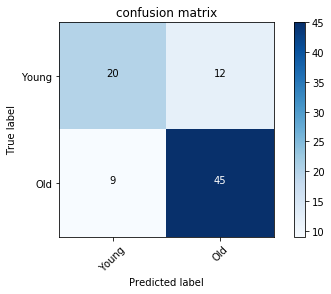

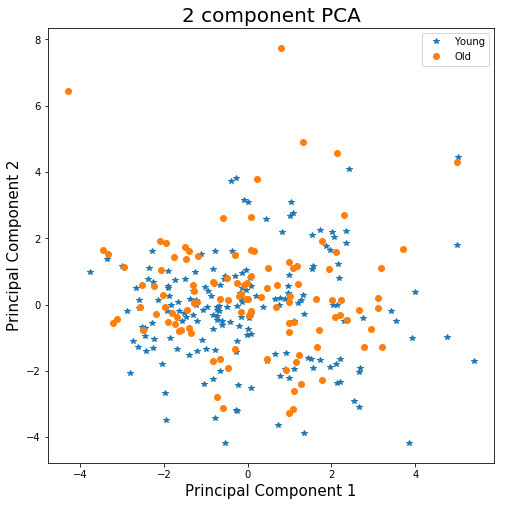

In [39]:
clf = LogisticRegression(max_iter=1000, penalty='l1')
Classifier_performance(clf, ["Young", "Old"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# SVM Based model :
Predicting if the driver is young or old from their driving data all 275 data used¶

Training Accuracy Score:  0.86
validation Accuracy Score: 0.7209302325581395
Classification Report: 
             precision    recall  f1-score   support

      Young       0.62      0.66      0.64        32
        Old       0.79      0.76      0.77        54

avg / total       0.72      0.72      0.72        86

Confusion matrix, without normalization
[[21 11]
 [13 41]]


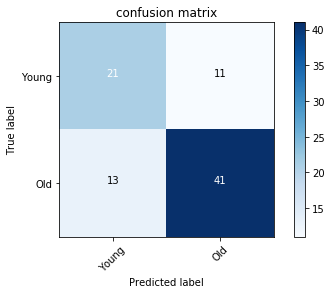

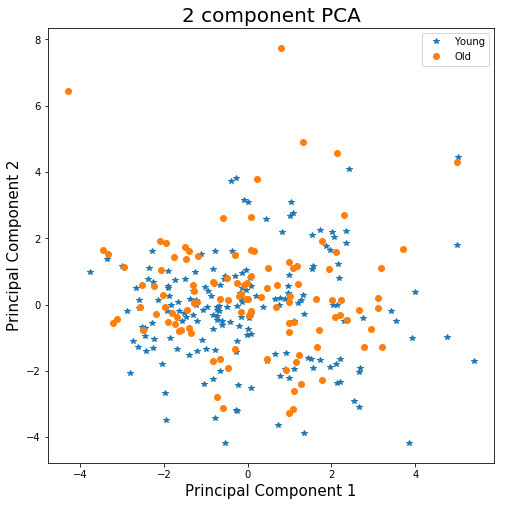

In [40]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10, 0.5, 0.25, 0.125, 0.065], "degree":[3, 5, 7, 9, 15]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=3)
Classifier_performance(clf, ["Young", "Old"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# Random Forest Based Machine Learning Models¶:
Predicting Crash risk for including just crash and baseline condition. (Near crash not considered) using the vehicle profile from both young and old driver.

Training Accuracy Score:  1.0
validation Accuracy Score: 0.7209302325581395
Classification Report: 
             precision    recall  f1-score   support

      Young       0.65      0.53      0.59        32
        Old       0.75      0.83      0.79        54

avg / total       0.71      0.72      0.71        86

Confusion matrix, without normalization
[[17 15]
 [ 9 45]]


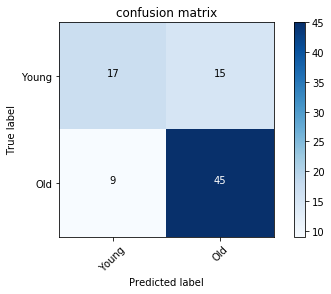

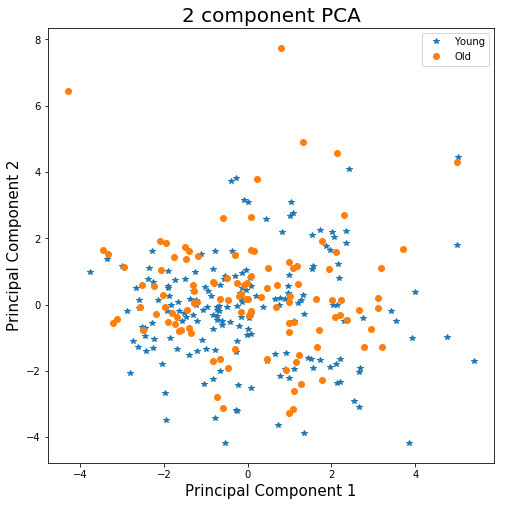

In [41]:
parameters = {"n_estimators":[1, 5, 10, 25, 50, 100, 250], "criterion":["gini", "entropy"], "max_depth":[5, 10, 26, 50, 100]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=7)
Classifier_performance(clf, ["Young", "Old"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [42]:
est = sm.OLS(y, filledData.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     18.75
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           1.42e-58
Time:                        15:23:33   Log-Likelihood:                -105.06
No. Observations:                 286   AIC:                             312.1
Df Residuals:                     235   BIC:                             498.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Time_day                -0.0874 

# Model to predict old driver at risk of crash or not

In [45]:
leftTurn = pd.read_excel("leftturn_new.xlsx")

old_crash = leftTurn[(leftTurn["age"]>=65) & ((leftTurn["crashStatus"]=="Crash"))]
old_baseline = leftTurn[(leftTurn["age"]>=65) & (leftTurn["crashStatus"]=="Balanced-Sample Baseline")][:30]
leftTurn = pd.concat([old_crash, old_baseline])
data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent",
                      "preIncidentManeuver", "crash", "maneuverJudgment", "incomplete_video", 
                      "vehicle_movement", 'intersection_type'], axis = 1)

# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', 'age']]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')
temp = (temp - temp.mean())/temp.std()

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', 'age']] = temp

# Filling Qualtrics Varible with 1



y = data["crashStatus"]
data = data.drop( 'crashStatus', axis=1)
y[y=="Balanced-Sample Baseline"] = False
y[y != False] = True
y  = np.asarray(y,dtype=np.float64)

filledData = data.fillna(1)

print("Number of crashs events: ", sum(y))
print("Class Balance with Crash and Baseline Condition: ", sum(y)/len(y))
# from sklearn.feature_selection import SelectKBest,f_classif
# selector = SelectKBest(f_classif, k=10).fit(filledData,y)
# featurefilledData = selector.transform(filledData)
X_train, X_test, y_train, y_test = train_test_split(filledData, y, train_size=0.7, random_state=42)

Number of crashs events:  25.0
Class Balance with Crash and Baseline Condition:  0.45454545454545453


Training Accuracy Score:  0.9736842105263158
validation Accuracy Score: 0.7058823529411765
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.64      1.00      0.78         9
   Old drivers at risk       1.00      0.38      0.55         8

           avg / total       0.81      0.71      0.67        17

Confusion matrix, without normalization
[[9 0]
 [5 3]]


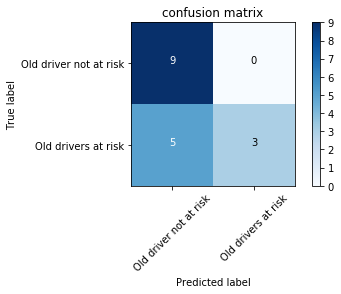

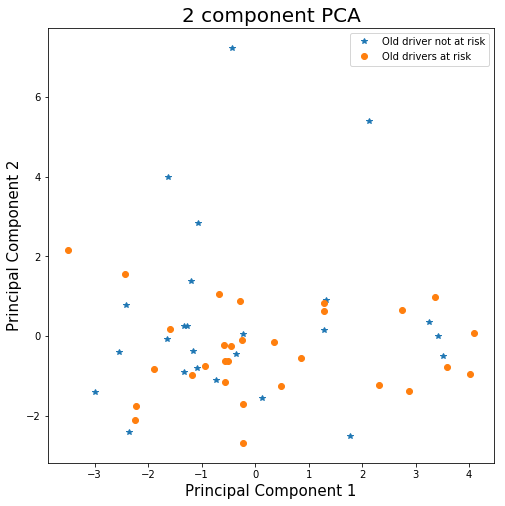

In [46]:
clf = LogisticRegression(max_iter=100, penalty='l1')
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# SVM Based model to predict old driver at risk of crash or not:

Training Accuracy Score:  0.9473684210526315
validation Accuracy Score: 0.7058823529411765
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.64      1.00      0.78         9
   Old drivers at risk       1.00      0.38      0.55         8

           avg / total       0.81      0.71      0.67        17

Confusion matrix, without normalization
[[9 0]
 [5 3]]


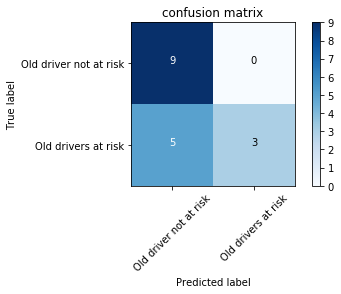

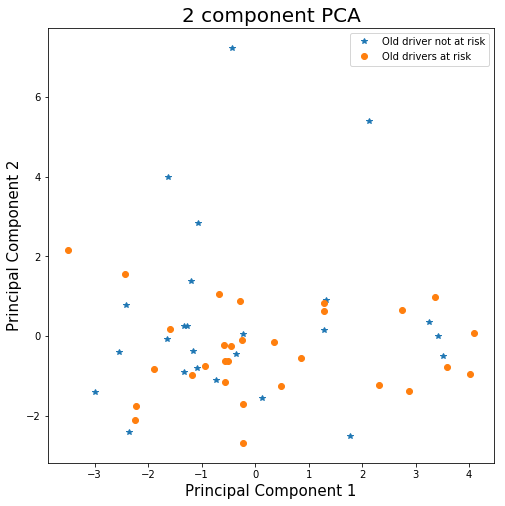

In [47]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10, 0.5, 0.25, 0.125, 0.065], "degree":[3, 5, 7, 9, 15]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=3)
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# Random Forest Based Machine Learning Models¶:
    predict old driver at risk of crash or not:


Training Accuracy Score:  1.0
validation Accuracy Score: 0.7058823529411765
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.67      0.89      0.76         9
   Old drivers at risk       0.80      0.50      0.62         8

           avg / total       0.73      0.71      0.69        17

Confusion matrix, without normalization
[[8 1]
 [4 4]]


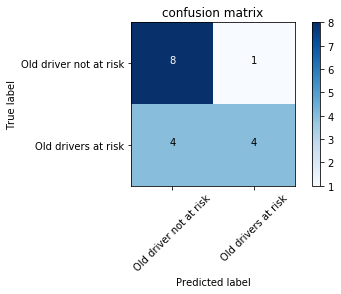

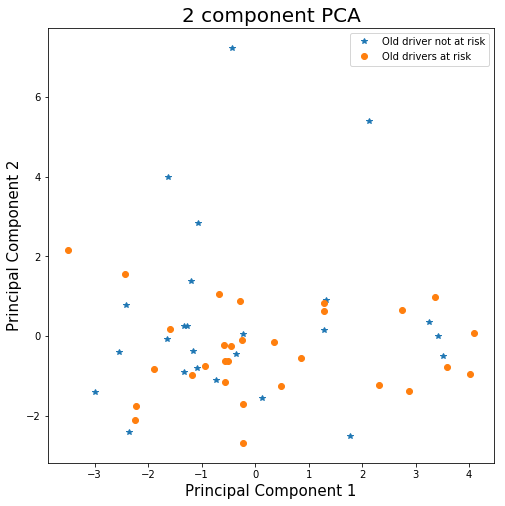

In [48]:
parameters = {"n_estimators":[1, 5, 10, 25, 50, 100, 250], "criterion":["gini", "entropy"], "max_depth":[5, 10, 26, 50, 100]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=7)
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [49]:
est = sm.OLS(y, filledData.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3.821
Date:                Mon, 22 Oct 2018   Prob (F-statistic):              0.147
Time:                        15:29:24   Log-Likelihood:                 75.507
No. Observations:                  55   AIC:                            -47.01
Df Residuals:                       3   BIC:                             57.37
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Time_day                -0.0601 

# drivers 65 or less at the crash risk or not

In [56]:
leftTurn = pd.read_excel("leftturn_new.xlsx")

young_crash = leftTurn[(leftTurn["age"]<=65) & ((leftTurn["crashStatus"]=="Crash"))]
young_baseline = leftTurn[(leftTurn["age"]<=65) & (leftTurn["crashStatus"]=="Balanced-Sample Baseline")][:20]
leftTurn = pd.concat([young_crash, young_baseline])
data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent",
                      "preIncidentManeuver", "crash", "maneuverJudgment", "incomplete_video", 
                      "vehicle_movement", 'intersection_type'], axis = 1)

# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed']]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')
temp = (temp - temp.mean())/temp.std()

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed']] = temp

# Filling Qualtrics Varible with 1
y = data["crashStatus"]
data = data.drop( 'crashStatus', axis=1)
filledData = data.fillna(1)
y[y=="Balanced-Sample Baseline"] = False
y[y != False] = True
y  = np.asarray(y,dtype=np.float64)


print("Number of crashs events: ", sum(y))
print("Class Balance with Crash and Baseline Condition: ", sum(y)/len(y))
# from sklearn.feature_selection import SelectKBest,f_classif
# selector = SelectKBest(f_classif, k=10).fit(filledData,y)
# featurefilledData = selector.transform(filledData)
X_train, X_test, y_train, y_test = train_test_split(filledData, y, train_size=0.7, random_state=42)

Number of crashs events:  10.0
Class Balance with Crash and Baseline Condition:  0.3333333333333333


Training Accuracy Score:  0.9523809523809523
validation Accuracy Score: 0.5555555555555556
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.71      0.71      0.71         7
   Old drivers at risk       0.00      0.00      0.00         2

           avg / total       0.56      0.56      0.56         9

Confusion matrix, without normalization
[[5 2]
 [2 0]]


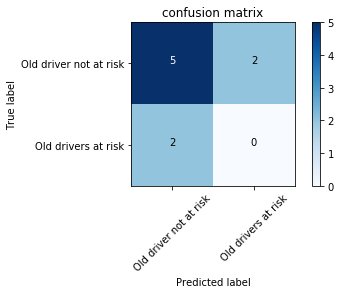

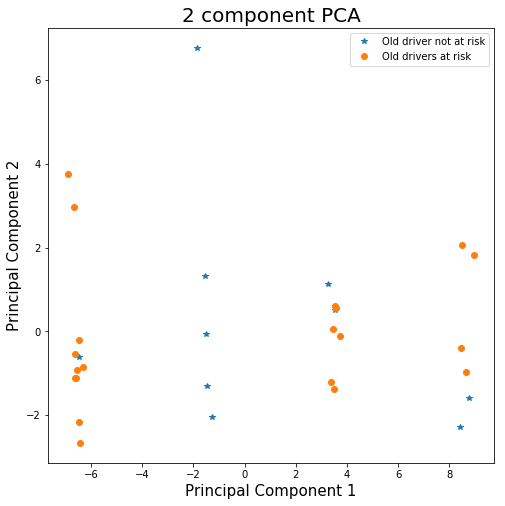

In [58]:
clf = LogisticRegression(max_iter=100, penalty='l1')
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# SVM Based model to predict drivers 65 or less at the crash risk or not¶


Training Accuracy Score:  0.8571428571428571
validation Accuracy Score: 0.7777777777777778
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.78      1.00      0.88         7
   Old drivers at risk       0.00      0.00      0.00         2

           avg / total       0.60      0.78      0.68         9

Confusion matrix, without normalization
[[7 0]
 [2 0]]


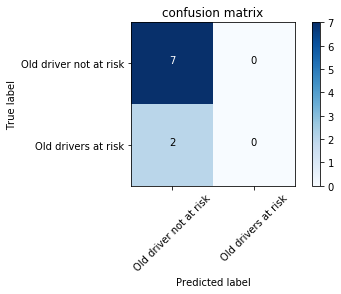

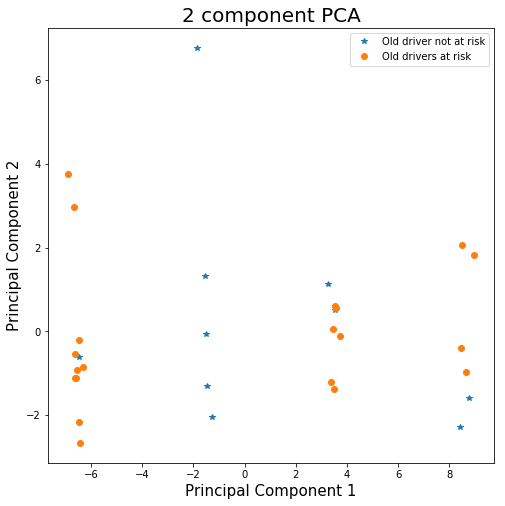

In [59]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10, 0.5, 0.25, 0.125, 0.065], "degree":[3, 5, 7, 9, 15]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=3)
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

# Random Forest Based Machine Learning Models¶:
drivers 65 or less at the crash risk or not¶¶

Training Accuracy Score:  1.0
validation Accuracy Score: 0.6666666666666666
Classification Report: 
                        precision    recall  f1-score   support

Old driver not at risk       0.75      0.86      0.80         7
   Old drivers at risk       0.00      0.00      0.00         2

           avg / total       0.58      0.67      0.62         9

Confusion matrix, without normalization
[[6 1]
 [2 0]]


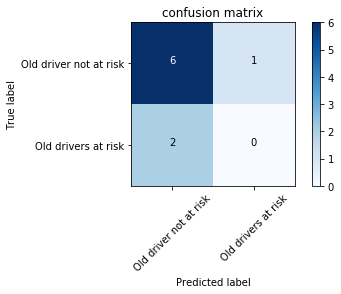

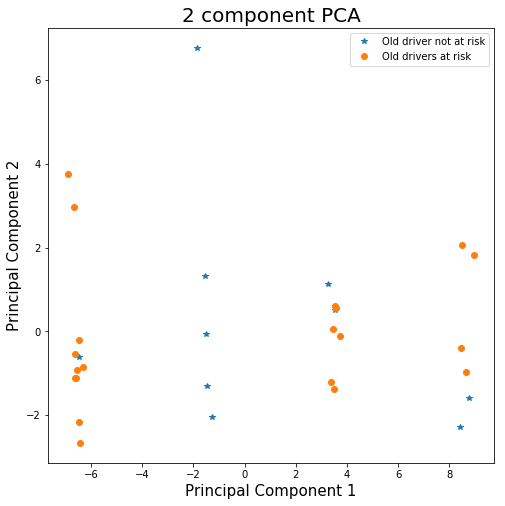

In [60]:
parameters = {"n_estimators":[1, 5, 10, 25, 50, 100, 250], "criterion":["gini", "entropy"], "max_depth":[5, 10, 26, 50, 100]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=7)
Classifier_performance(clf, ["Old driver not at risk", "Old drivers at risk"], y, filledData=filledData, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )

In [61]:
est = sm.OLS(y, filledData.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 22 Oct 2018   Prob (F-statistic):                nan
Time:                        15:40:01   Log-Likelihood:                 949.70
No. Observations:                  30   AIC:                            -1839.
Df Residuals:                       0   BIC:                            -1797.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Time_day                -0.3629 